In [1]:
from scipy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import helpers
import plots
import iaf
import scipy

In [3]:
dur = 0.1
dt = 1e-4
f = 256
t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)

u = helpers.gen_band_limited(dur, dt, f)

alpha = 0.001  # firing parameter
theta = 0.000001  # threshold

gamma = 0.25
Ts = 1/f
psi_kernel = helpers.rcosfilter(t_0_centered, gamma, Ts)
closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)

spike_indices, ys, q_signs = iaf.IAF_encode(u, dt, alpha, theta)

u_rec, sk = iaf.IAF_decode(spike_indices, q_signs, t, alpha, theta, psi_kernel, closed_phi_kernel)

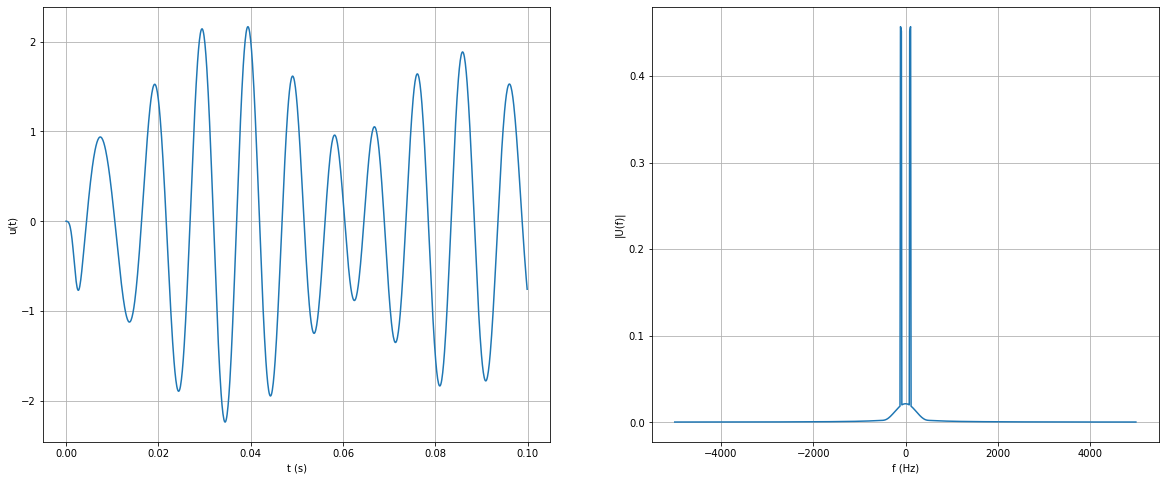

In [4]:
plots.plot_signal_and_fourier(t, u, dt)

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


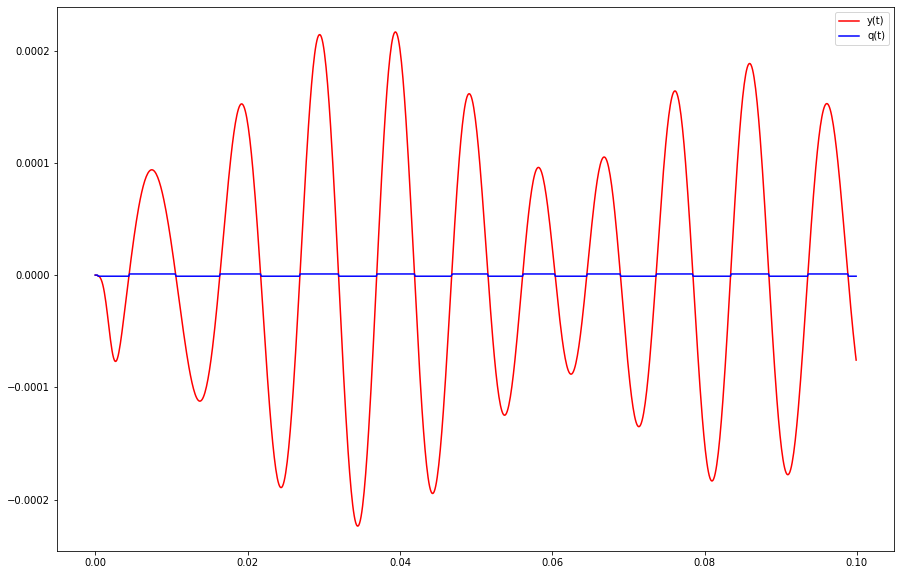

In [5]:
zs = helpers.get_spike_signal(spike_indices, q_signs, ys.shape[0], theta)
plots.plot_integral_and_spikes(t, ys, zs, 'feichtinger')

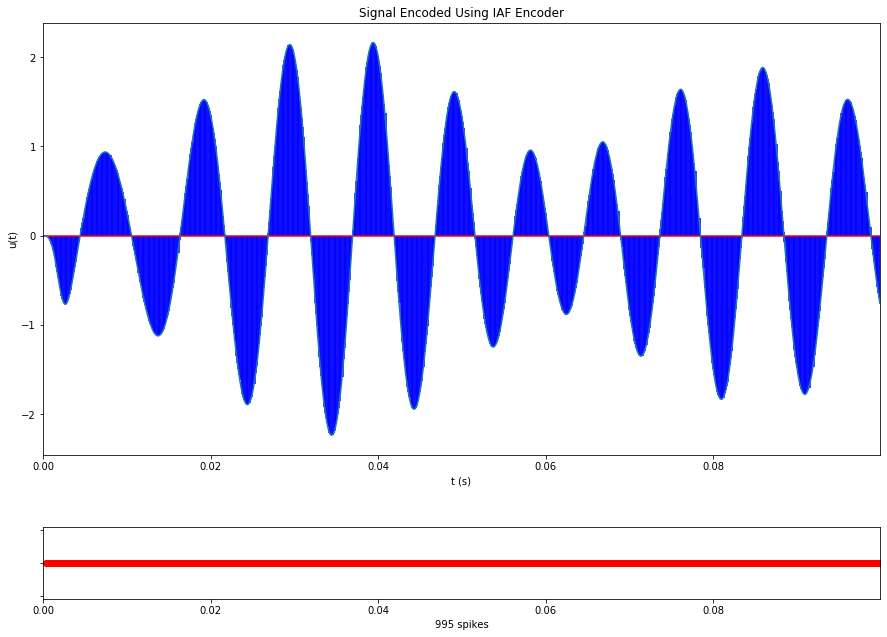

In [6]:
fig_title = 'Signal Encoded Using IAF Encoder'
ts = t[spike_indices]
plots.plot_encoded(t, u, ts, fig_title)

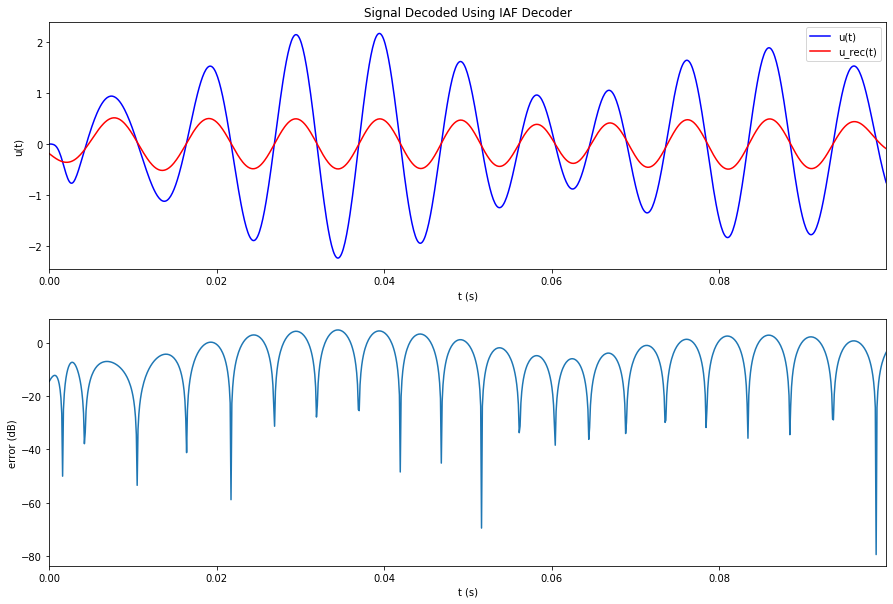

In [7]:
fig_title = 'Signal Decoded Using IAF Decoder'
plots.plot_compare(t, u, u_rec, fig_title)

# Experiments

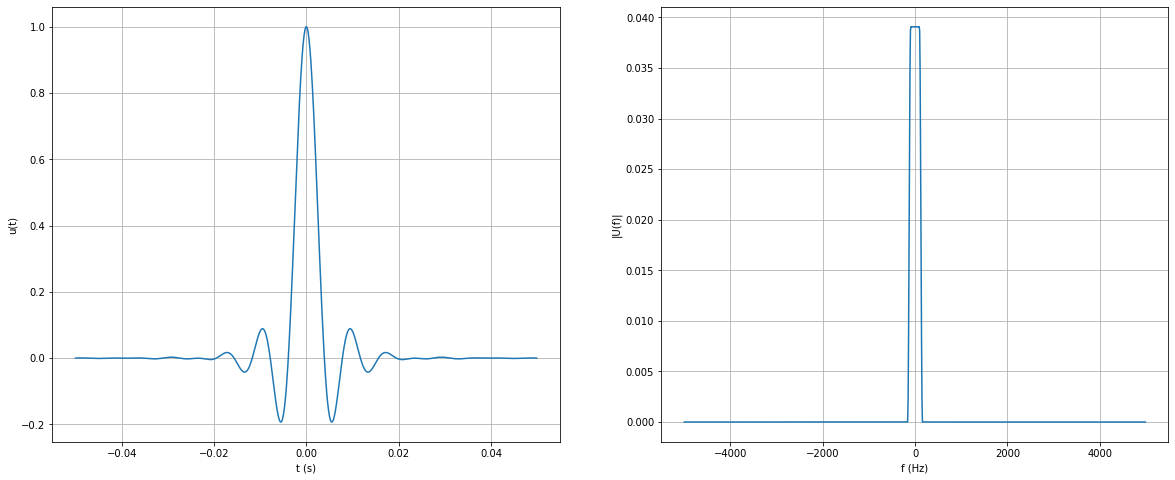

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


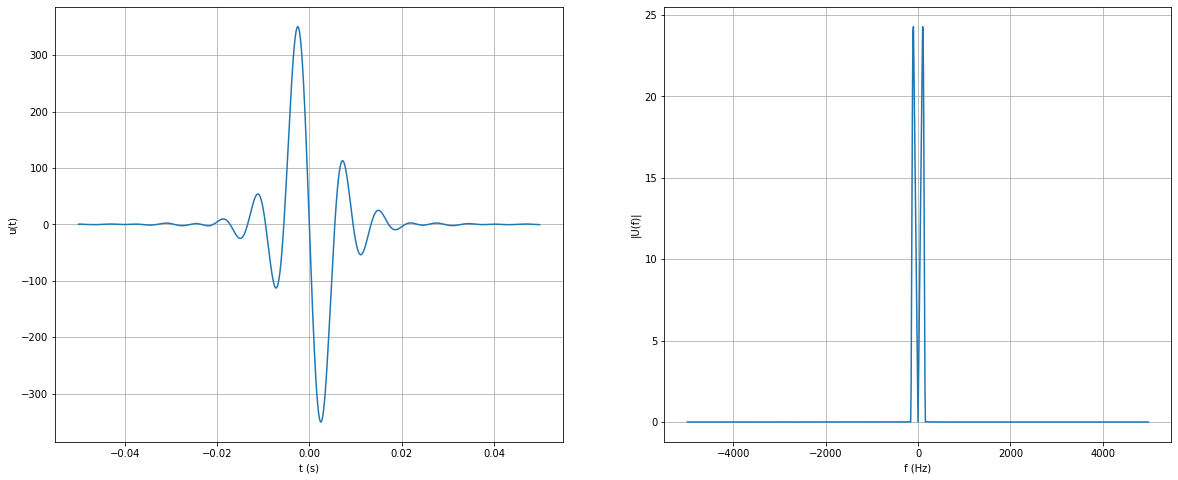

In [8]:
# Visualising both kernels :
# First : Psi (raised cosine)
# Second : Phi
phi_kernel = helpers.get_phi_from_psi(psi_kernel, len(t_0_centered), dt, alpha)
plots.plot_signal_and_fourier(t_0_centered, psi_kernel, dt)
plots.plot_signal_and_fourier(t_0_centered, phi_kernel, dt)

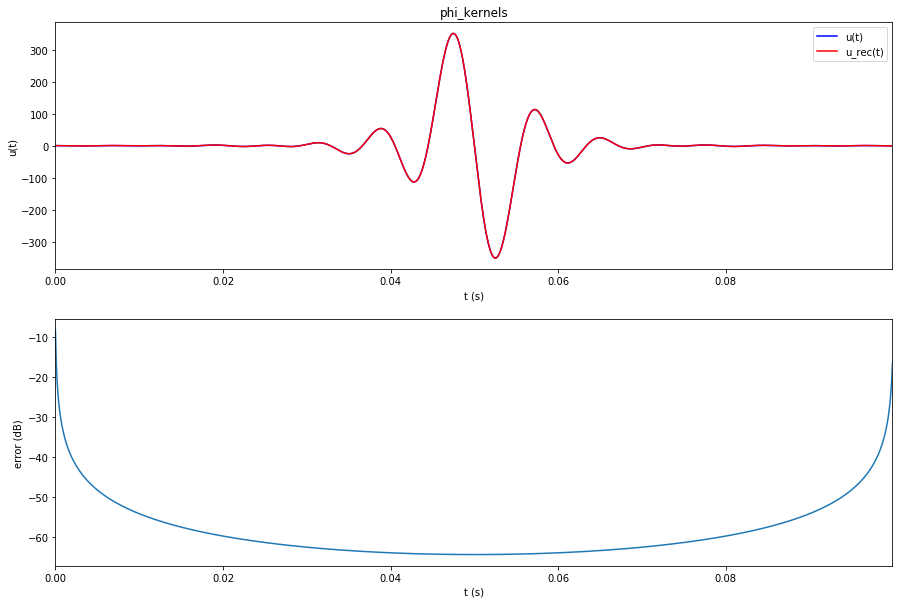

In [9]:
closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)
fig_title = 'phi_kernels'
plots.plot_compare(t, closed_phi_kernel, phi_kernel, fig_title)

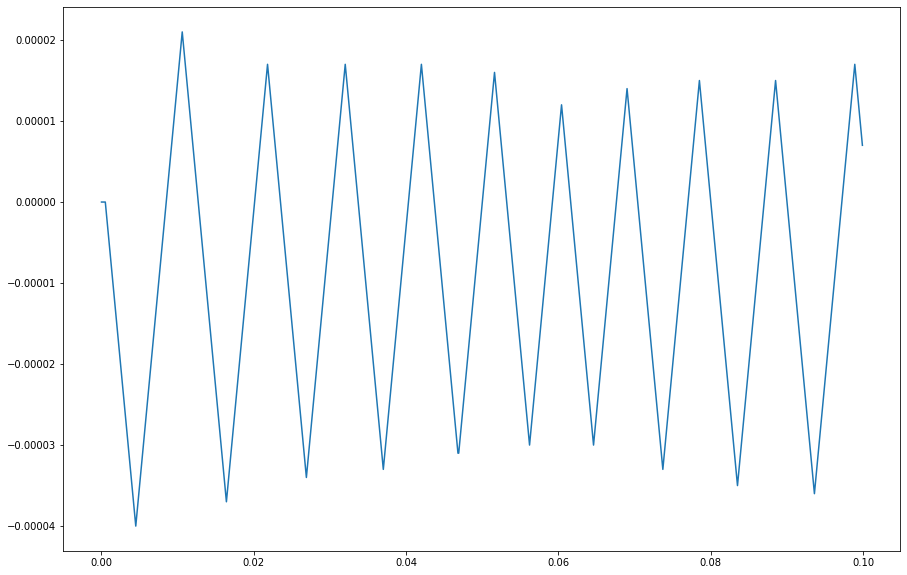

In [10]:
# Visualising Sk
plt.figure(figsize=(15, 10))
plt.plot(t, sk)

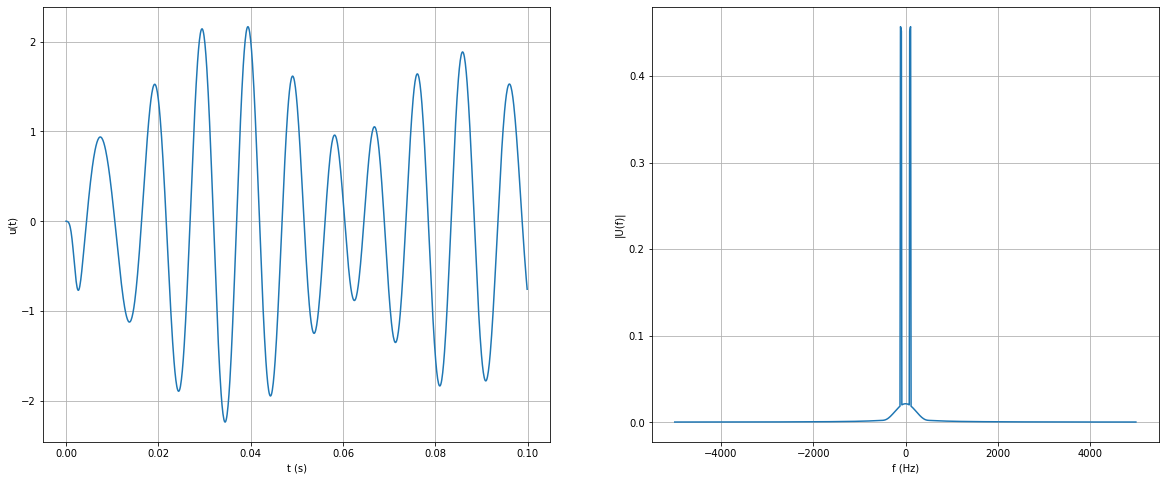

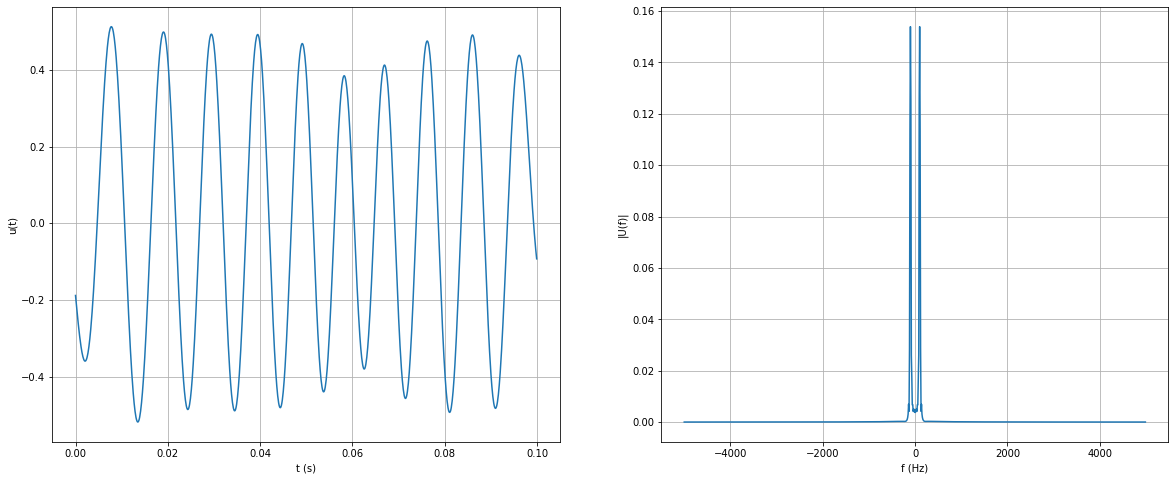

In [11]:
# Visualising both u and u_rec
# First : U (original signal)
# Second : U_rec (recovered signal)
#### Same waveforme, however amplitudes are much bigger in the recovered signal
plots.plot_signal_and_fourier(t, u, dt)
plots.plot_signal_and_fourier(t, u_rec, dt)

In [12]:
u = helpers.gen_band_limited(dur, dt, f)

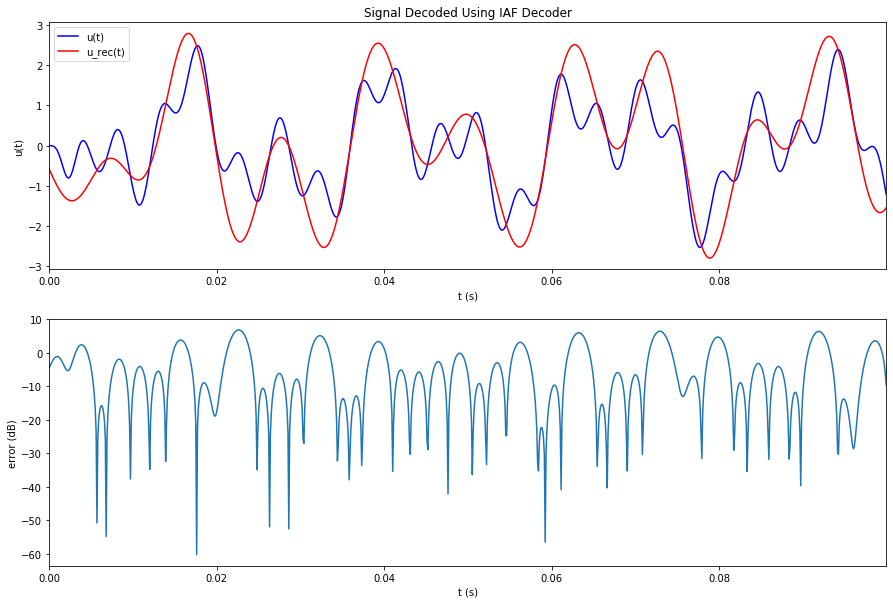

In [21]:
dur = 0.1
dt = 1e-4
f = 256
t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)



alpha = 0.001 # firing parameter
theta = 0.000005  # threshold

gamma = 0.01
Ts = 1/f
psi_kernel = helpers.rcosfilter(t_0_centered, gamma, Ts)
closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)

spike_indices, ys, q_signs = iaf.IAF_encode(u, dt, alpha, theta)

u_rec, sk = iaf.IAF_decode(spike_indices, q_signs, t, alpha, theta, psi_kernel, closed_phi_kernel)
fig_title = 'Signal Decoded Using IAF Decoder'
plots.plot_compare(t, u, u_rec, fig_title)

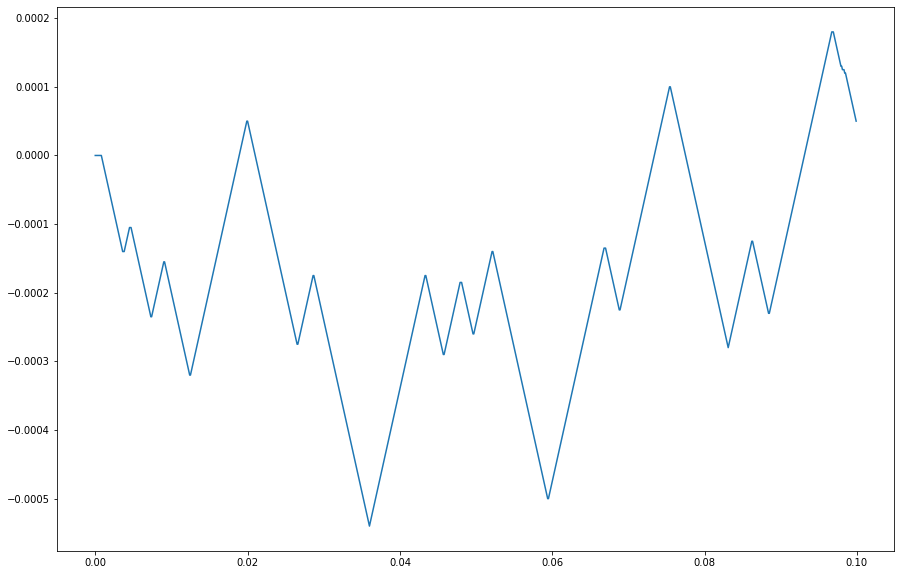

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(t, sk)

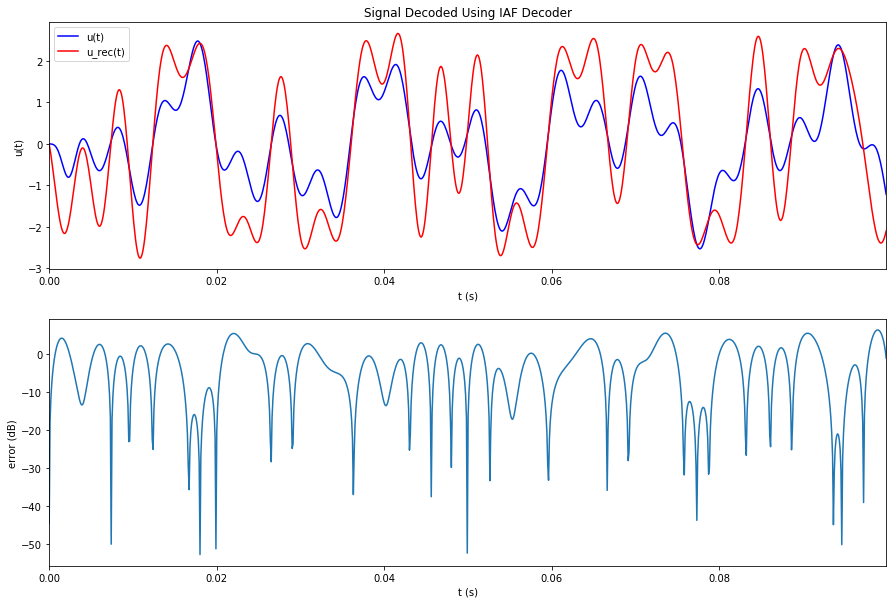

In [30]:
dur = 0.1
dt = 1e-4
f = 256
t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)



alpha = 0.1  # firing parameter
theta = 0.00001  # threshold

gamma = 0.1
Ts = 1/(2*f)
psi_kernel = helpers.rcosfilter(t_0_centered, gamma, Ts)
closed_phi_kernel = helpers.closed_phi_from_rcos(t_0_centered, gamma, Ts, alpha)

spike_indices, ys, q_signs = iaf.IAF_encode(u, dt, alpha, theta)

u_rec, sk = iaf.IAF_decode(spike_indices, q_signs, t, alpha, theta, psi_kernel, closed_phi_kernel)
fig_title = 'Signal Decoded Using IAF Decoder'
plots.plot_compare(t, u, u_rec, fig_title)

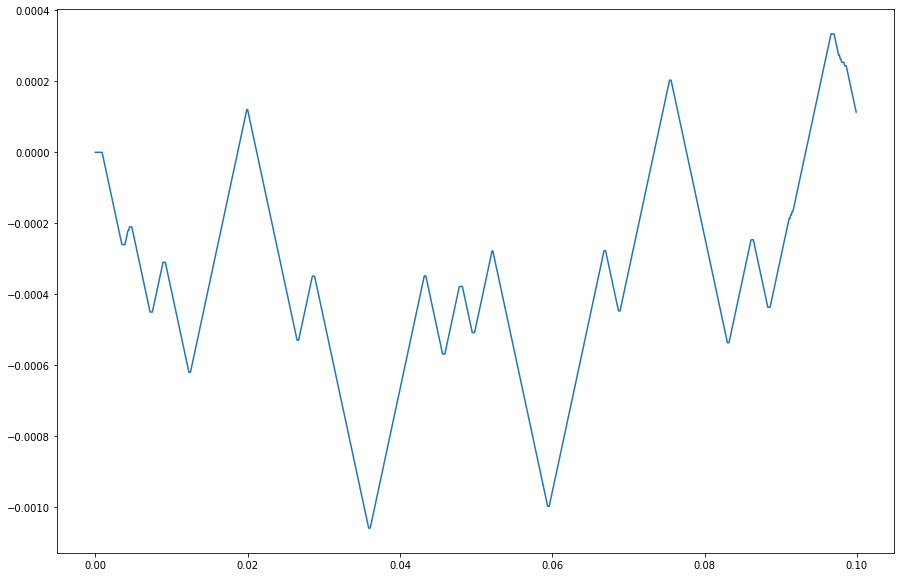

In [31]:
plt.figure(figsize=(15, 10))
plt.plot(t, sk)